---
# Regresiones Lineales SKLearn


---

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

#### Carga de los datos a analizar

In [2]:
df = pd.read_csv('Galton.txt', sep='\t')

#### Breve análisis exploratorio

In [3]:
df.head()

,Family,Father,Mother,Gender,Height,Kids
0,1,78.5,67.0,M,73.2,4
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
4,2,75.5,66.5,M,73.5,4


In [19]:
df.shape

(898, 6)

In [4]:
df.groupby('Gender').mean()

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_3952\3774296011.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  df.groupby('Gender').mean()


,Father,Mother,Height,Kids
Gender,,,,
F,69.302309,64.169515,64.110162,6.311778
M,69.168172,64.005161,69.228817,5.972043


#### Análisis visual

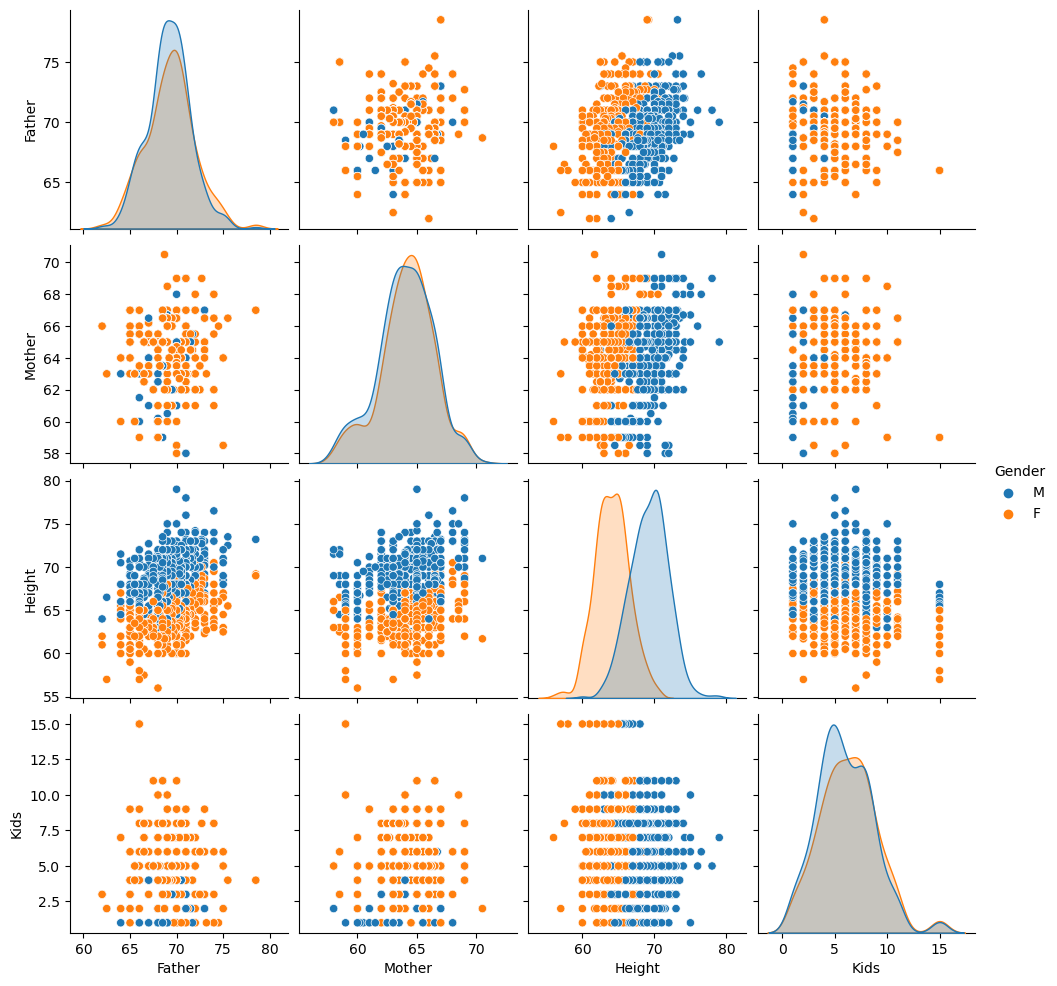

In [5]:
sns.pairplot(data=df, hue='Gender')

### Hipótesis de Trabajo

El modelo lo vamos a plantear en función del tamaño de la hija con el de la madre, por lo tanto creamos un dataframe con los datos del género femenino

In [6]:
df_f = df[ df['Gender']=='F' ]

Graficamos la dispersión de ambas variables

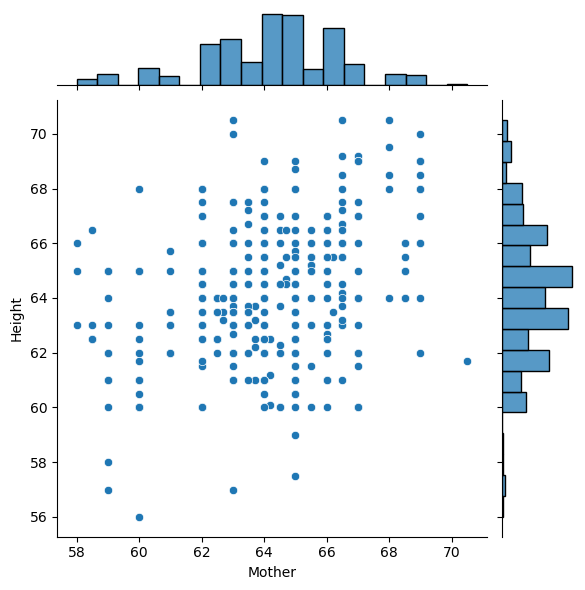

In [7]:
sns.jointplot(data=df_f, x='Mother', y='Height')

### Formulación del Modelo

In [9]:
X=df_f[['Mother']]
y=df_f['Height']

In [12]:
X.head(2)

,Mother
1,67.0
2,67.0


### Validación Cruzada

In [13]:
import sklearn

In [14]:
from sklearn.model_selection import train_test_split

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [21]:
print(X_train.shape)



(346, 1)


In [23]:
X_train.count()

Mother    346
dtype: int64

In [24]:
X_test.count()

Mother    87
dtype: int64

### Entrenamiento del modelo lineal

In [36]:
from sklearn.linear_model import LinearRegression

In [85]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [40]:
# coeficientes ajustados
lm.coef_

array([0.32561679])

In [41]:
# intercepto 
lm.intercept_

43.17026674816181

In [57]:
# Alt Hija = a? + b? * Alt Madre
Altura_Madre=62

Altura_Hija= 43.17026674816181+0.32561679*Altura_Madre

In [58]:
Altura_Hija

63.35850772816181

#### Haciendo algunas predicciones

In [43]:
# predicciones sobre un valor
p1=[[62]]
lm.predict(p1)

C:\Users\Sebastian\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([63.35850788])

In [45]:
# predicciones sobre varios valores
p2=[[50],
    [60],
    [80]]
lm.predict(p2)

C:\Users\Sebastian\anaconda3\lib\site-packages\sklearn\base.py:420: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([59.45110637, 62.70727429, 69.21961014])

In [46]:
y_pred=lm.predict(X_test)

In [47]:
y_pred[:5]

array([64.00974146, 64.66097505, 63.68412467, 64.33535826, 64.66097505])

In [48]:
y_test[:5]

881    60.0
137    66.5
357    64.0
54     64.5
765    65.5
Name: Height, dtype: float64

#### Graficando la recta de regresión

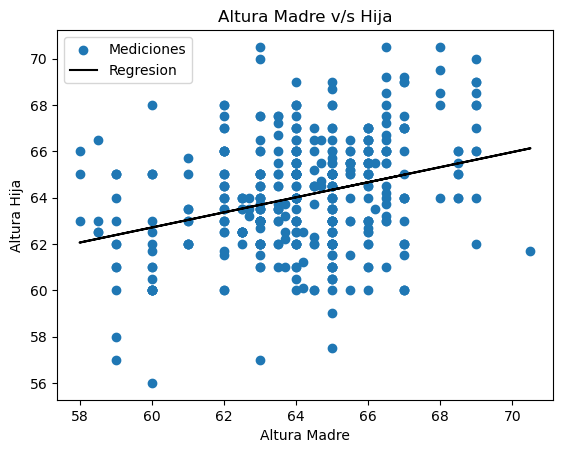

In [49]:
plt.scatter(df_f['Mother'],df_f['Height'], label='Mediciones')
plt.plot(X,lm.predict(X), color='black', label='Regresion') 
plt.xlabel('Altura Madre')
plt.ylabel('Altura Hija')
plt.title('Altura Madre v/s Hija')
plt.legend(loc=0)

#### Métricas de Error

In [51]:
from sklearn import metrics

Calculando las métricas de error

In [52]:
# Mean Absolute Error
metrics.mean_absolute_error(y_test,y_pred)

1.9628377999047744

In [53]:
# Mean Squared Error
metrics.mean_squared_error(y_test,y_pred)

6.423322381500185

In [54]:
# Root Medium Squared Error
metrics.mean_squared_error(y_test,y_pred)**.5

2.53442742675741

Indicador R-cuadrado

In [59]:
# R-Squared
lm.score(X_test,y_test)

0.06336700925967509

#### Análisis de Residuales

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_3952\2126161201.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred-y_test, bins=20)


<Axes: xlabel='Height', ylabel='Density'>

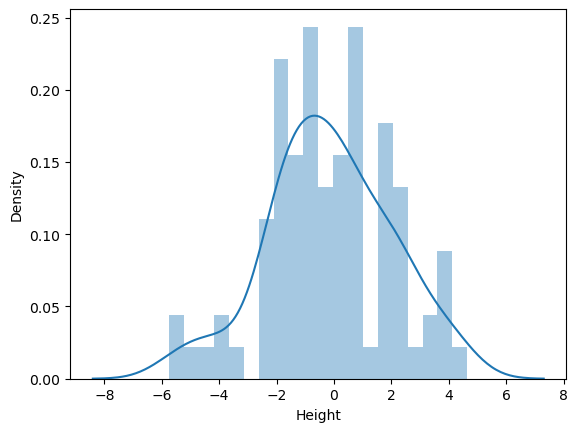

In [86]:
sns.distplot(y_pred-y_test, bins=20)

Graficamos el valor real versus el valor predicho

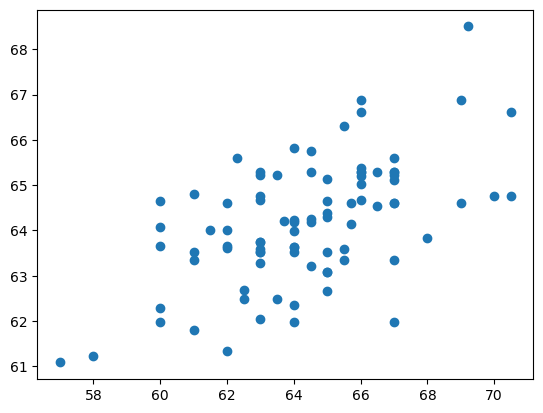

In [87]:
plt.scatter(y_test,y_pred)

### Hipótesis de Trabajo 2

La altura de la hija depende de la altura del padre y de la altura de la madre de forma lineal

In [61]:
X=df_f[['Father','Mother']]
y=df_f['Height']

In [62]:
df_f.head()

,Family,Father,Mother,Gender,Height,Kids
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
6,2,75.5,66.5,F,65.5,4
7,2,75.5,66.5,F,65.5,4


#### Formulación del Modelo

In [63]:
X=df_f[['Father','Mother']]
y=df_f['Height']

In [64]:
df_f.head()

,Family,Father,Mother,Gender,Height,Kids
1,1,78.5,67.0,F,69.2,4
2,1,78.5,67.0,F,69.0,4
3,1,78.5,67.0,F,69.0,4
6,2,75.5,66.5,F,65.5,4
7,2,75.5,66.5,F,65.5,4


#### Validación Cruzada

In [65]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [66]:
X_train.shape

(346, 2)

In [68]:
X_test.shape

(87, 2)

#### Entrenamiento del Regresor Lineal

In [69]:
lm = LinearRegression()
lm.fit(X_train, y_train)

LinearRegression()

In [70]:
# coeficientes ajustados
lm.coef_

array([0.38719195, 0.30575471])

In [72]:
# intercepto 
lm.intercept_

17.623855738130388

In [74]:
# Alt Hija = a? + b? * Alt Madre
Altura_Madre=62
Altura_Padre=78

Altura_Hija= 17.623855738130388+0.38719195*Altura_Padre+0.30575471*Altura_Madre

In [75]:
Altura_Hija

66.78161985813038

#### Métricas de Error

In [76]:
# hacemos predicciones con el nuevo modelo
y_pred=lm.predict(X_test)

In [77]:
# Mean Absolute Error
metrics.mean_absolute_error(y_test,y_pred)

1.7194203272019488

In [78]:
# Mean Squared Error
metrics.mean_squared_error(y_test,y_pred)

4.693701870870295

In [79]:
# Root Medium Squared Error
metrics.mean_squared_error(y_test,y_pred)**.5

2.1664952967570215

Indicador R-cuadrado

In [80]:
# R-Squared
lm.score(X_test,y_test)

0.3155759963693524

#### Análisis de Residuales

C:\Users\Sebastian\AppData\Local\Temp\ipykernel_3952\2126161201.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(y_pred-y_test, bins=20)


<Axes: xlabel='Height', ylabel='Density'>

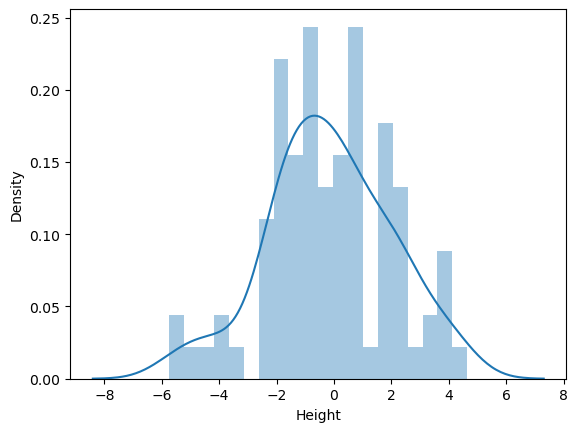

In [81]:
sns.distplot(y_pred-y_test, bins=20)

### Hipótesis 3
